In [1]:
import os
import pandas as pd
import numpy as np
from datetime import datetime as dt
import seaborn as sb
import matplotlib.pyplot as plt

Reading the data 

In [2]:
df=pd.read_csv(('./Originations_Data.csv'))
df.head()

C:\Users\vinee\AppData\Local\Temp\ipykernel_20572\908686118.py:1: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"C:\Users\vinee\OneDrive\Desktop\Case study\Originations_Data.csv")


,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Original Loan Term,Number of Borrowers,Seller Name,Servicer Name,Super Conforming Flag,Pre-HARP Loan Sequence Number,Program Indicator,HARP Indicator,Property Valuation Method,Interest Only Indicator
0,654,201803,N,204802,NaN,0,1,P,77,35,...,360,1,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
1,693,201803,N,203302,24340.0,0,1,P,80,41,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N
2,757,201803,Y,204802,NaN,25,1,P,97,10,...,360,1,Other sellers,Other servicers,NaN,NaN,H,NaN,2,N
3,807,201803,N,203302,NaN,0,1,P,26,38,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,2,N
4,812,201803,N,203302,19340.0,0,1,P,14,14,...,180,2,Other sellers,Other servicers,NaN,NaN,9,NaN,1,N


# 1.Total number of records

In [89]:
record_count=df.shape[0]
print('The total number of records is:',record_count)

The total number of records is: 141735


# 2 .Missing Counts and % - for each variable

In [90]:
t1=dt.now()
rows=df.shape[0]
def get_missing_counts_pcts(df):
    for col in df.columns:
        missing_count=df[col].isnull().sum()
        #print(col,missing_count,rows)
        missing_pct=missing_count/rows*100
        if missing_pct>0:
            print(f'Missing_percent for column {col} is: {round(missing_pct,2)}')
        else:
            print(f'There are no missing values for column {col}.')
get_missing_counts_pcts(df)    
t2=dt.now()
#print("Time taken for execution is:",t2-t1)


There are no missing values for column Credit Score.
There are no missing values for column First Payment Date.
There are no missing values for column First Time Homebuyer Flag.
There are no missing values for column Maturity Date.
Missing_percent for column Metropolitan Statistical Area is: 9.25
There are no missing values for column Mortgage Insurance Percentage.
There are no missing values for column Number of Units.
There are no missing values for column Occupancy Status.
There are no missing values for column Original Combined Loan-to-Value.
There are no missing values for column Original Debt-to-Income Ratio.
There are no missing values for column Original UPB.
There are no missing values for column Original Loan-to-Value.
There are no missing values for column Original Interest Rate.
There are no missing values for column Channel.
There are no missing values for column Prepayment Penalty Mortgage Flag.
There are no missing values for column Amortization Type.
There are no missin

# 3. UID variables – number of duplicates, number of unique values

The Unique identifier in the data is the 'Loan Sequence Number', 
however other identifiers that we can use are as given below and the corresponding values of duplicates , uniques.

In [91]:
uid_list=['Loan Sequence Number','Seller Name', 'Servicer Name','Pre-HARP Loan Sequence Number']
print(f'The Unique ID variables are:',uid_list) 


print('\nNumber of duplicates:')

for col in uid_list:
    
    print(f'The number of duplicate values of column {col} is {len(df[df[col].duplicated()])}')

print('\nNumber of unique values:')
for col in uid_list:
    print(f'The number of unique values of column {col} is {len(df[col].unique())}')
    


The Unique ID variables are: ['Loan Sequence Number', 'Seller Name', 'Servicer Name', 'Pre-HARP Loan Sequence Number']

Number of duplicates:
The number of duplicate values of column Loan Sequence Number is 0
The number of duplicate values of column Seller Name is 141689
The number of duplicate values of column Servicer Name is 141692
The number of duplicate values of column Pre-HARP Loan Sequence Number is 141169

Number of unique values:
The number of unique values of column Loan Sequence Number is 141735
The number of unique values of column Seller Name is 46
The number of unique values of column Servicer Name is 43
The number of unique values of column Pre-HARP Loan Sequence Number is 566


# 4. For discrete variables, report frequencies of all discrete values (maximum 100). If more than 100, then club smaller frequencies together under Others so that no more than a frequency of 100 elements is reported. Avoid variables like Postal Code – which are expected to have discrete but lots of values.

The Discrete variables:

First Time Homebuyer Flag, 
Mortgage Insurance Percentage (MI %), 
Number of Units, 
Occupancy Status,
Channel,
Prepayment Penalty Mortgage (PPM) Flag, 
Amortization Type (Formerly Product Type), 
Property State, 
Property Type, 
Loan Purpose, 
Number of Borrowers, 
Seller Name, 
Servicer Name, 
Super Conforming Flag, 
Program Indicator, 
HARP Indicator, 
Property Valuation Method, 
Interest Only (I/O) Indicator.


In [92]:
disc_var_list=['First Time Homebuyer Flag', 'Mortgage Insurance Percentage', 'Number of Units',\
               'Occupancy Status', 'Channel', 'Prepayment Penalty Mortgage Flag', \
               'Amortization Type',\
               'Property State', 'Property Type', 'Loan Purpose', 'Number of Borrowers', 'Seller Name', 'Servicer Name', \
               'Super Conforming Flag', 'Program Indicator', 'HARP Indicator', 'Property Valuation Method',\
               'Interest Only Indicator']

for col in disc_var_list:
    print(f'Frequecy of {col} is:\n{df[col].value_counts().to_string()}\n')

Frequecy of First Time Homebuyer Flag is:
N    111703
Y     30032

Frequecy of Mortgage Insurance Percentage is:
0     99271
25    17922
30    15886
12     6345
18      701
6       621
35      575
16      404
20        7
24        1
33        1
15        1

Frequecy of Number of Units is:
1    138824
2      2077
3       480
4       354

Frequecy of Occupancy Status is:
P    126677
I      9403
S      5655

Frequecy of Channel is:
R    78728
C    46458
B    16549

Frequecy of Prepayment Penalty Mortgage Flag is:
N    141735

Frequecy of Amortization Type is:
FRM    141735

Frequecy of Property State is:
CA    17356
TX    10738
FL     9187
IL     6263
OH     5276
MI     5263
AZ     5118
WA     4564
GA     4508
CO     4500
NC     4327
NY     4130
PA     3894
VA     3873
NJ     3784
IN     3616
MN     3364
MA     3209
TN     2833
MO     2805
UT     2766
MD     2677
WI     2672
OR     2615
SC     2188
KY     1812
NV     1779
AL     1515
LA     1407
OK     1259
CT     1234
ID     1174
KS     

# 5. For continuous numeric variables – like amount variables or ratio or percentage variables, report the minimum, the 1, 5, 10, 25, 50, 75, 90, 95, 99 percentiles, maximum and mean values.


The continuous variables :
Credit Score, 
First Payment Date, 
Maturity Date, 
Metropolitan Statistical Area (MSA) Or Metropolitan Division, 
Original Combined Loan-to-Value (CLTV), 
Original Debt-to-Income (DTI) Ratio, 
Original UPB, 
Original Loan-to-Value (LTV), 
Original Interest Rate, 
Postal Code, 
Loan Sequence Number, 
Original Loan Term, 
Pre-HARP Loan Sequence Number, 


In [93]:
cont_col_list=['Credit Score','First Payment Date','Maturity Date','Metropolitan Statistical Area',
'Original Combined Loan-to-Value',
'Original Debt-to-Income Ratio',
'Original UPB',
'Original Loan-to-Value',
'Original Interest Rate',
'Postal Code',
'Original Loan Term']


def get_stats(df):
    for col in cont_col_list:
    #print(len(df[col].unique()))
        print('\n')
        print(f'       The stats for {col} are:')
        print(f'\
        Minimum:{df[col].min()}\n\
        1st %le:{df[col].quantile(.01)}\n\
        5th %le:{df[col].quantile(.05)}\n\
        10th %le:{df[col].quantile(.10)}\n\
        25th %le:{df[col].quantile(.25)}\n\
        50th %le:{df[col].quantile(.50)}\n\
        75th %le:{df[col].quantile(.75)}\n\
        90th %le :{df[col].quantile(.90)}\n\
        95th %le :{df[col].quantile(.95)}\n\
        99th %le:{df[col].quantile(.99)}\n\
        Maximum: {df[col].max()}')

get_stats(df)   




       The stats for Credit Score are:
        Minimum:479
        1st %le:635.0
        5th %le:667.0
        10th %le:687.0
        25th %le:721.0
        50th %le:759.0
        75th %le:787.0
        90th %le :802.0
        95th %le :808.0
        99th %le:816.0
        Maximum: 9999


       The stats for First Payment Date are:
        Minimum:201803
        1st %le:201803.0
        5th %le:201804.0
        10th %le:201806.0
        25th %le:201811.0
        50th %le:201908.0
        75th %le:202004.0
        90th %le :202009.0
        95th %le :202011.0
        99th %le:202012.0
        Maximum: 202012


       The stats for Maturity Date are:
        Minimum:202602
        1st %le:203302.0
        5th %le:203403.0
        10th %le:203504.0
        25th %le:204804.0
        50th %le:204902.0
        75th %le:204912.0
        90th %le :205007.0
        95th %le :205009.0
        99th %le:205011.0
        Maximum: 205912


       The stats for Metropolitan Statistical Area are:
 

# 6.Plot, within Excel, the monthly volumes of applications (use First Payment Date for getting the monthly volumes) – from March ’18 to December ’20. Alongside, plot the mean of the Credit Score for applications corresponding to each of those months – on a secondary vertical axis.


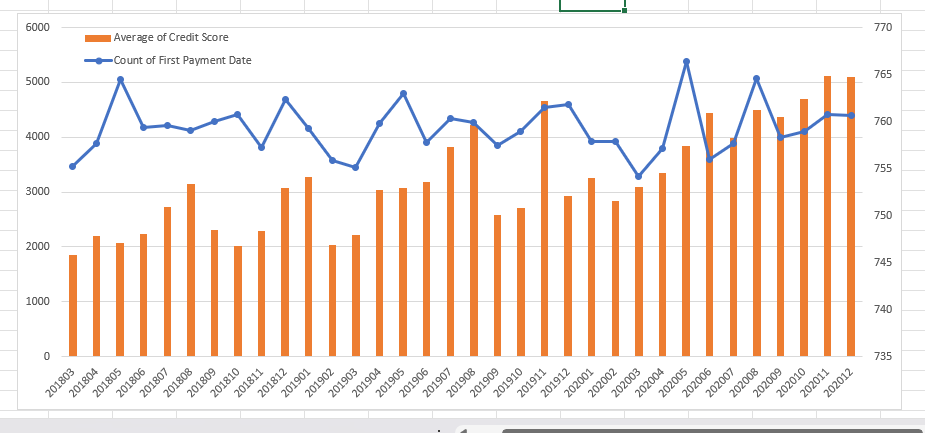

In [3]:
df2=pd.read_csv('./Behaviour_Data.csv')
df2.head()

,Loan Sequence Number,Delinquency_Bucket 201802,Delinquency_Bucket 201803,Delinquency_Bucket 201804,Delinquency_Bucket 201805,Delinquency_Bucket 201806,Delinquency_Bucket 201807,Delinquency_Bucket 201808,Delinquency_Bucket 201809,Delinquency_Bucket 201810,...,Delinquency_Bucket 202107,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate
0,F18Q10000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,F18Q10000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,F18Q10000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,F18Q10000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,F18Q10000140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 8. Merge the Originations file with the Behaviour File – using an inner join. Loan Sequence Number is the UID based on which these 2 files should be merged.  Are there any records in the Originations file that do not match the Behaviour File, and vice versa?


In [95]:
df_merged=pd.merge(df,df2,on='Loan Sequence Number',how='inner')
right_merge=pd.merge(df,df2,on='Loan Sequence Number',how='right').shape[0]
left_merge=pd.merge(df,df2,on='Loan Sequence Number',how='left').shape[0]
inner_merge=df_merged.shape[0]
print('Unmatched rows in the Originations file are:',left_merge-inner_merge)
print('Unmatched rows in the Behavioural file are:',right_merge-inner_merge)

Unmatched rows in the Originations file are: 3
Unmatched rows in the Behavioural file are: 8265


# 9. Using the monthly delinquency buckets describing the payment regularity of the applicants, create a variable called Maximum Delinquency – which captures the maximum delinquency buckets across all the months that each applicant has ever touched. Records having a delinquency bucket value of 99 in any of the months should be ignored from this analysis.


In [96]:
delinq_cols=df2.columns[1:51]
delinq_cols

Index(['Delinquency_Bucket 201802', 'Delinquency_Bucket 201803',
       'Delinquency_Bucket 201804', 'Delinquency_Bucket 201805',
       'Delinquency_Bucket 201806', 'Delinquency_Bucket 201807',
       'Delinquency_Bucket 201808', 'Delinquency_Bucket 201809',
       'Delinquency_Bucket 201810', 'Delinquency_Bucket 201811',
       'Delinquency_Bucket 201812', 'Delinquency_Bucket 201901',
       'Delinquency_Bucket 201902', 'Delinquency_Bucket 201903',
       'Delinquency_Bucket 201904', 'Delinquency_Bucket 201905',
       'Delinquency_Bucket 201906', 'Delinquency_Bucket 201907',
       'Delinquency_Bucket 201908', 'Delinquency_Bucket 201909',
       'Delinquency_Bucket 201910', 'Delinquency_Bucket 201911',
       'Delinquency_Bucket 201912', 'Delinquency_Bucket 202001',
       'Delinquency_Bucket 202002', 'Delinquency_Bucket 202003',
       'Delinquency_Bucket 202004', 'Delinquency_Bucket 202005',
       'Delinquency_Bucket 202006', 'Delinquency_Bucket 202007',
       'Delinquency_Bucke

In [97]:
def get_max_delinq(dataframe):
    dataframe=dataframe.fillna(0)
    
    for index,row in dataframe.iterrows():
        delinquency_counts=[row[col] for col in delinq_cols]
        maximum=max(delinquency_counts) if max(delinquency_counts)!=99 else np.nan
        dataframe.at[index,'Maximum Delinquency']=maximum
    return dataframe
                    
df_merged=get_max_delinq(df_merged)



In [98]:
df_merged[['First Payment Date','Maximum Delinquency']].to_csv('BI_1_data.csv')
df_merged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,Maximum Delinquency
0,654,201803,N,204802,0.0,0,1,P,77,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,693,201803,N,203302,24340.0,0,1,P,80,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,757,201803,Y,204802,0.0,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,807,201803,N,203302,0.0,0,1,P,26,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,812,201803,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,202012,N,204011,11244.0,0,1,P,49,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141728,785,202012,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141729,730,202012,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141730,691,202012,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 10. Now, create a chart in Power BI that contains the percentage distribution of Maximum Delinquency for applicants across the months. Maximum Delinquency of >3 cycles should be combined under one bucket: 3+. So, say for applicants whose First Payment Date is in March ’18, what percentage of them have MaxDelq of 0, 1, 2, or 3+ should be calculated. Similarly, calculate this distribution for all the other months till Dec’20. The plot should have the year-month on the horizontal axis and the percentage distributions plotted on the vertical axis.



In [99]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141732 entries, 0 to 141731
Data columns (total 83 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Credit Score                      141732 non-null  int64  
 1   First Payment Date                141732 non-null  int64  
 2   First Time Homebuyer Flag         141732 non-null  object 
 3   Maturity Date                     141732 non-null  int64  
 4   Metropolitan Statistical Area     141732 non-null  float64
 5   Mortgage Insurance Percentage     141732 non-null  int64  
 6   Number of Units                   141732 non-null  int64  
 7   Occupancy Status                  141732 non-null  object 
 8   Original Combined Loan-to-Value   141732 non-null  int64  
 9   Original Debt-to-Income Ratio     141732 non-null  int64  
 10  Original UPB                      141732 non-null  int64  
 11  Original Loan-to-Value            141732 non-null  i

# 11. The aim is to look at the accounts that originated every month (the First Payment Date belongs to a certain month) and see what percentage of accounts hit 3 cycles of delinquency after 1 month, 2 months, etc. for the entire range of monthly data available. So, accounts originated in Mar’18 shall have nearly 48 months of data till Mar’22 whilst accounts originated in Dec’20 shall have only around 15 months of data till Mar’22. The objective is to create a 2-dimensional matrix – where there is Month of Origination on one side and Months to Become Bad (i.e. 3+ cycles delinquent) on the other. Of course, a greater chunk of the population would have never touched 3 cycles or more – which can be recorded separately.


In [100]:
df_merged[['Months_to_be_1_Delinq','Months_to_be_2_Delinq','Months_to_be_3_Delinq']]=[0,0,0]
df_merged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,Maximum Delinquency,Months_to_be_1_Delinq,Months_to_be_2_Delinq,Months_to_be_3_Delinq
0,654,201803,N,204802,0.0,0,1,P,77,35,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
1,693,201803,N,203302,24340.0,0,1,P,80,41,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
2,757,201803,Y,204802,0.0,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
3,807,201803,N,203302,0.0,0,1,P,26,38,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,812,201803,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,202012,N,204011,11244.0,0,1,P,49,37,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
141728,785,202012,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
141729,730,202012,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
141730,691,202012,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


In [101]:
df_merged['month']=pd.to_datetime(df_merged['First Payment Date'],format='%Y%m')

In [102]:

for index, row in df_merged.iterrows():
    first_month=row['First Payment Date']
    d1=row['month']
    lsn=row['Loan Sequence Number']
    col_to_start='Delinquency_Bucket '+str(first_month)
    cols_to_check=[x for x in delinq_cols if x>col_to_start]

    #count=0
    list_1=[bucket for bucket in cols_to_check if row[bucket]==1]
    m1_1=999 if not list_1 else min(list_1)    #if there is no 1 delinq we are assigning a dummy value
    d2=dt.strptime(str(m1_1[-6:]),'%Y%m') if m1_1!=999 else 999       #dummy value 999 for no 1 delinquncy loans
    diff=(d2.year-d1.year)*12+d2.month-d1.month if d2!=999 else 999
    df_merged.at[index,'Months_to_be_1_Delinq']=diff
    
    
    list_2=[bucket for bucket in cols_to_check if row[bucket]==2]
    m1_2=999 if not list_2 else min(list_2)    #if there is no 1 delinq we are assigning a dummy value
    d2=dt.strptime(str(m1_2[-6:]),'%Y%m') if m1_2!=999 else 999       #dummy value 999 for no 2 delinquncy loans
    diff=(d2.year-d1.year)*12+d2.month-d1.month if d2!=999 else 999
    df_merged.at[index,'Months_to_be_2_Delinq']=diff
    
    
    list_3=[bucket for bucket in cols_to_check if row[bucket]>=3]
    m1_3=999 if not list_3 else min(list_3)    #if there is no 1 delinq we are assigning a dummy value
    d2=dt.strptime(str(m1_3[-6:]),'%Y%m') if m1_3!=999 else 999       #dummy value 999 for no 3 delinquncy loans
    diff=(d2.year-d1.year)*12+d2.month-d1.month if d2!=999 else 999
    df_merged.at[index,'Months_to_be_3_Delinq']=diff
    

    

In [103]:
df_merged.to_csv('matrix_data.csv')

In [104]:
matrix_data=df_merged[['month','Months_to_be_3_Delinq']]
matrix_data=matrix_data[matrix_data['Months_to_be_3_Delinq']!=999] #Removing the dummy rows




index months 48
columns months to become delinq===48 columns

48*48 matrix



        4mnths 5months 6mnths.............. 15months
201803   588
201804

....
....
202012                                        4363


Grouping the data based on the payment data and the months taken to become delinquent


In [105]:

matrix_data_grouped=matrix_data.groupby(['month','Months_to_be_3_Delinq']).agg(count_loans=('Months_to_be_3_Delinq','count')).reset_index()
#matrix_data_grouped.index=matrix_data_grouped['First Payment Date']
#matrix_data_grouped.drop(columns='First Payment Date',inplace=True)
matrix_data_grouped

,month,Months_to_be_3_Delinq,count_loans
0,2018-03-01,6,1
1,2018-03-01,7,1
2,2018-03-01,8,2
3,2018-03-01,9,1
4,2018-03-01,13,2
...,...,...,...
822,2020-12-01,7,4
823,2020-12-01,9,4
824,2020-12-01,10,1
825,2020-12-01,12,2


In [106]:
matrix_cols=[str(x)+' months' for x in range(3,49)] # Column names
matrix_index=df_merged['month'].unique()      # row indices
matrix=pd.DataFrame(index=matrix_index,columns=matrix_cols) #Empty dataframe 

def fill_the_matrix(matrix):
    for months in matrix.index:    
        for delinq_months in matrix.columns:
#             print('delinq_cols:',months,delinq_months)
            try:
                # We are taking the values for the intersection of particular first payment month and the months that took
                #eg: 201804 is the first payment month and for that month the count of the loans that took 7 months to be
                #3+delinq. Then the value in the matrix for row index 201804, and col index 3 months
                value=matrix_data_grouped[(matrix_data_grouped['month']==months) & \
                                          (matrix_data_grouped['Months_to_be_3_Delinq']==\
                                           int(delinq_months[0:2]))]['count_loans'].values[0] 
            except IndexError:
                value=0
            matrix.loc[months][delinq_months]=value
    return matrix
        
matrix=fill_the_matrix(matrix)
matrix

,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,12 months,...,39 months,40 months,41 months,42 months,43 months,44 months,45 months,46 months,47 months,48 months
2018-03-01,0,0,0,1,1,2,1,0,0,0,...,1,2,3,0,0,2,0,1,1,0
2018-04-01,0,0,0,0,0,2,0,0,1,1,...,0,1,1,1,1,2,0,1,1,0
2018-05-01,0,2,0,2,1,2,1,2,1,0,...,0,1,1,0,2,0,0,0,0,0
2018-06-01,0,0,1,0,0,1,1,3,2,2,...,6,1,0,1,3,2,0,0,0,0
2018-07-01,0,0,2,0,0,0,1,2,0,1,...,1,0,1,4,1,1,0,0,0,0
2018-11-01,0,0,0,0,2,1,0,3,2,3,...,2,0,0,0,0,0,0,0,0,0
2018-09-01,1,1,0,0,1,1,0,2,1,4,...,2,1,1,1,0,0,0,0,0,0
2019-01-01,1,1,0,0,2,2,0,2,2,1,...,0,0,0,0,0,0,0,0,0,0
2019-06-01,1,0,0,0,1,0,2,1,1,62,...,0,0,0,0,0,0,0,0,0,0
2018-10-01,1,1,1,0,2,0,2,1,3,2,...,0,1,1,0,0,0,0,0,0,0


In [107]:
matrix.to_csv('BI_2_Matrix_data.csv')

In [108]:
plot_data=pd.read_csv('BI_Matrix_data.csv')
plot_data['Unnamed: 0']=plot_data['Unnamed: 0'].astype(float)

In [109]:
plot_data

,Unnamed: 0,3 months,4 months,5 months,6 months,7 months,8 months,9 months,10 months,11 months,...,39 months,40 months,41 months,42 months,43 months,44 months,45 months,46 months,47 months,48 months
0,201803.0,0,0,0,1,1,2,1,0,0,...,1,2,3,0,0,2,0,1,1,0
1,201804.0,0,0,0,0,0,2,0,0,1,...,0,1,1,1,1,2,0,1,1,0
2,201805.0,0,2,0,2,1,2,1,2,1,...,0,1,1,0,2,0,0,0,0,0
3,201806.0,0,0,1,0,0,1,1,3,2,...,6,1,0,1,3,2,0,0,0,0
4,201807.0,0,0,2,0,0,0,1,2,0,...,1,0,1,4,1,1,0,0,0,0
5,201811.0,0,0,0,0,2,1,0,3,2,...,2,0,0,0,0,0,0,0,0,0
6,201809.0,1,1,0,0,1,1,0,2,1,...,2,1,1,1,0,0,0,0,0,0
7,201901.0,1,1,0,0,2,2,0,2,2,...,0,0,0,0,0,0,0,0,0,0
8,201906.0,1,0,0,0,1,0,2,1,1,...,0,0,0,0,0,0,0,0,0,0
9,201810.0,1,1,1,0,2,0,2,1,3,...,0,1,1,0,0,0,0,0,0,0


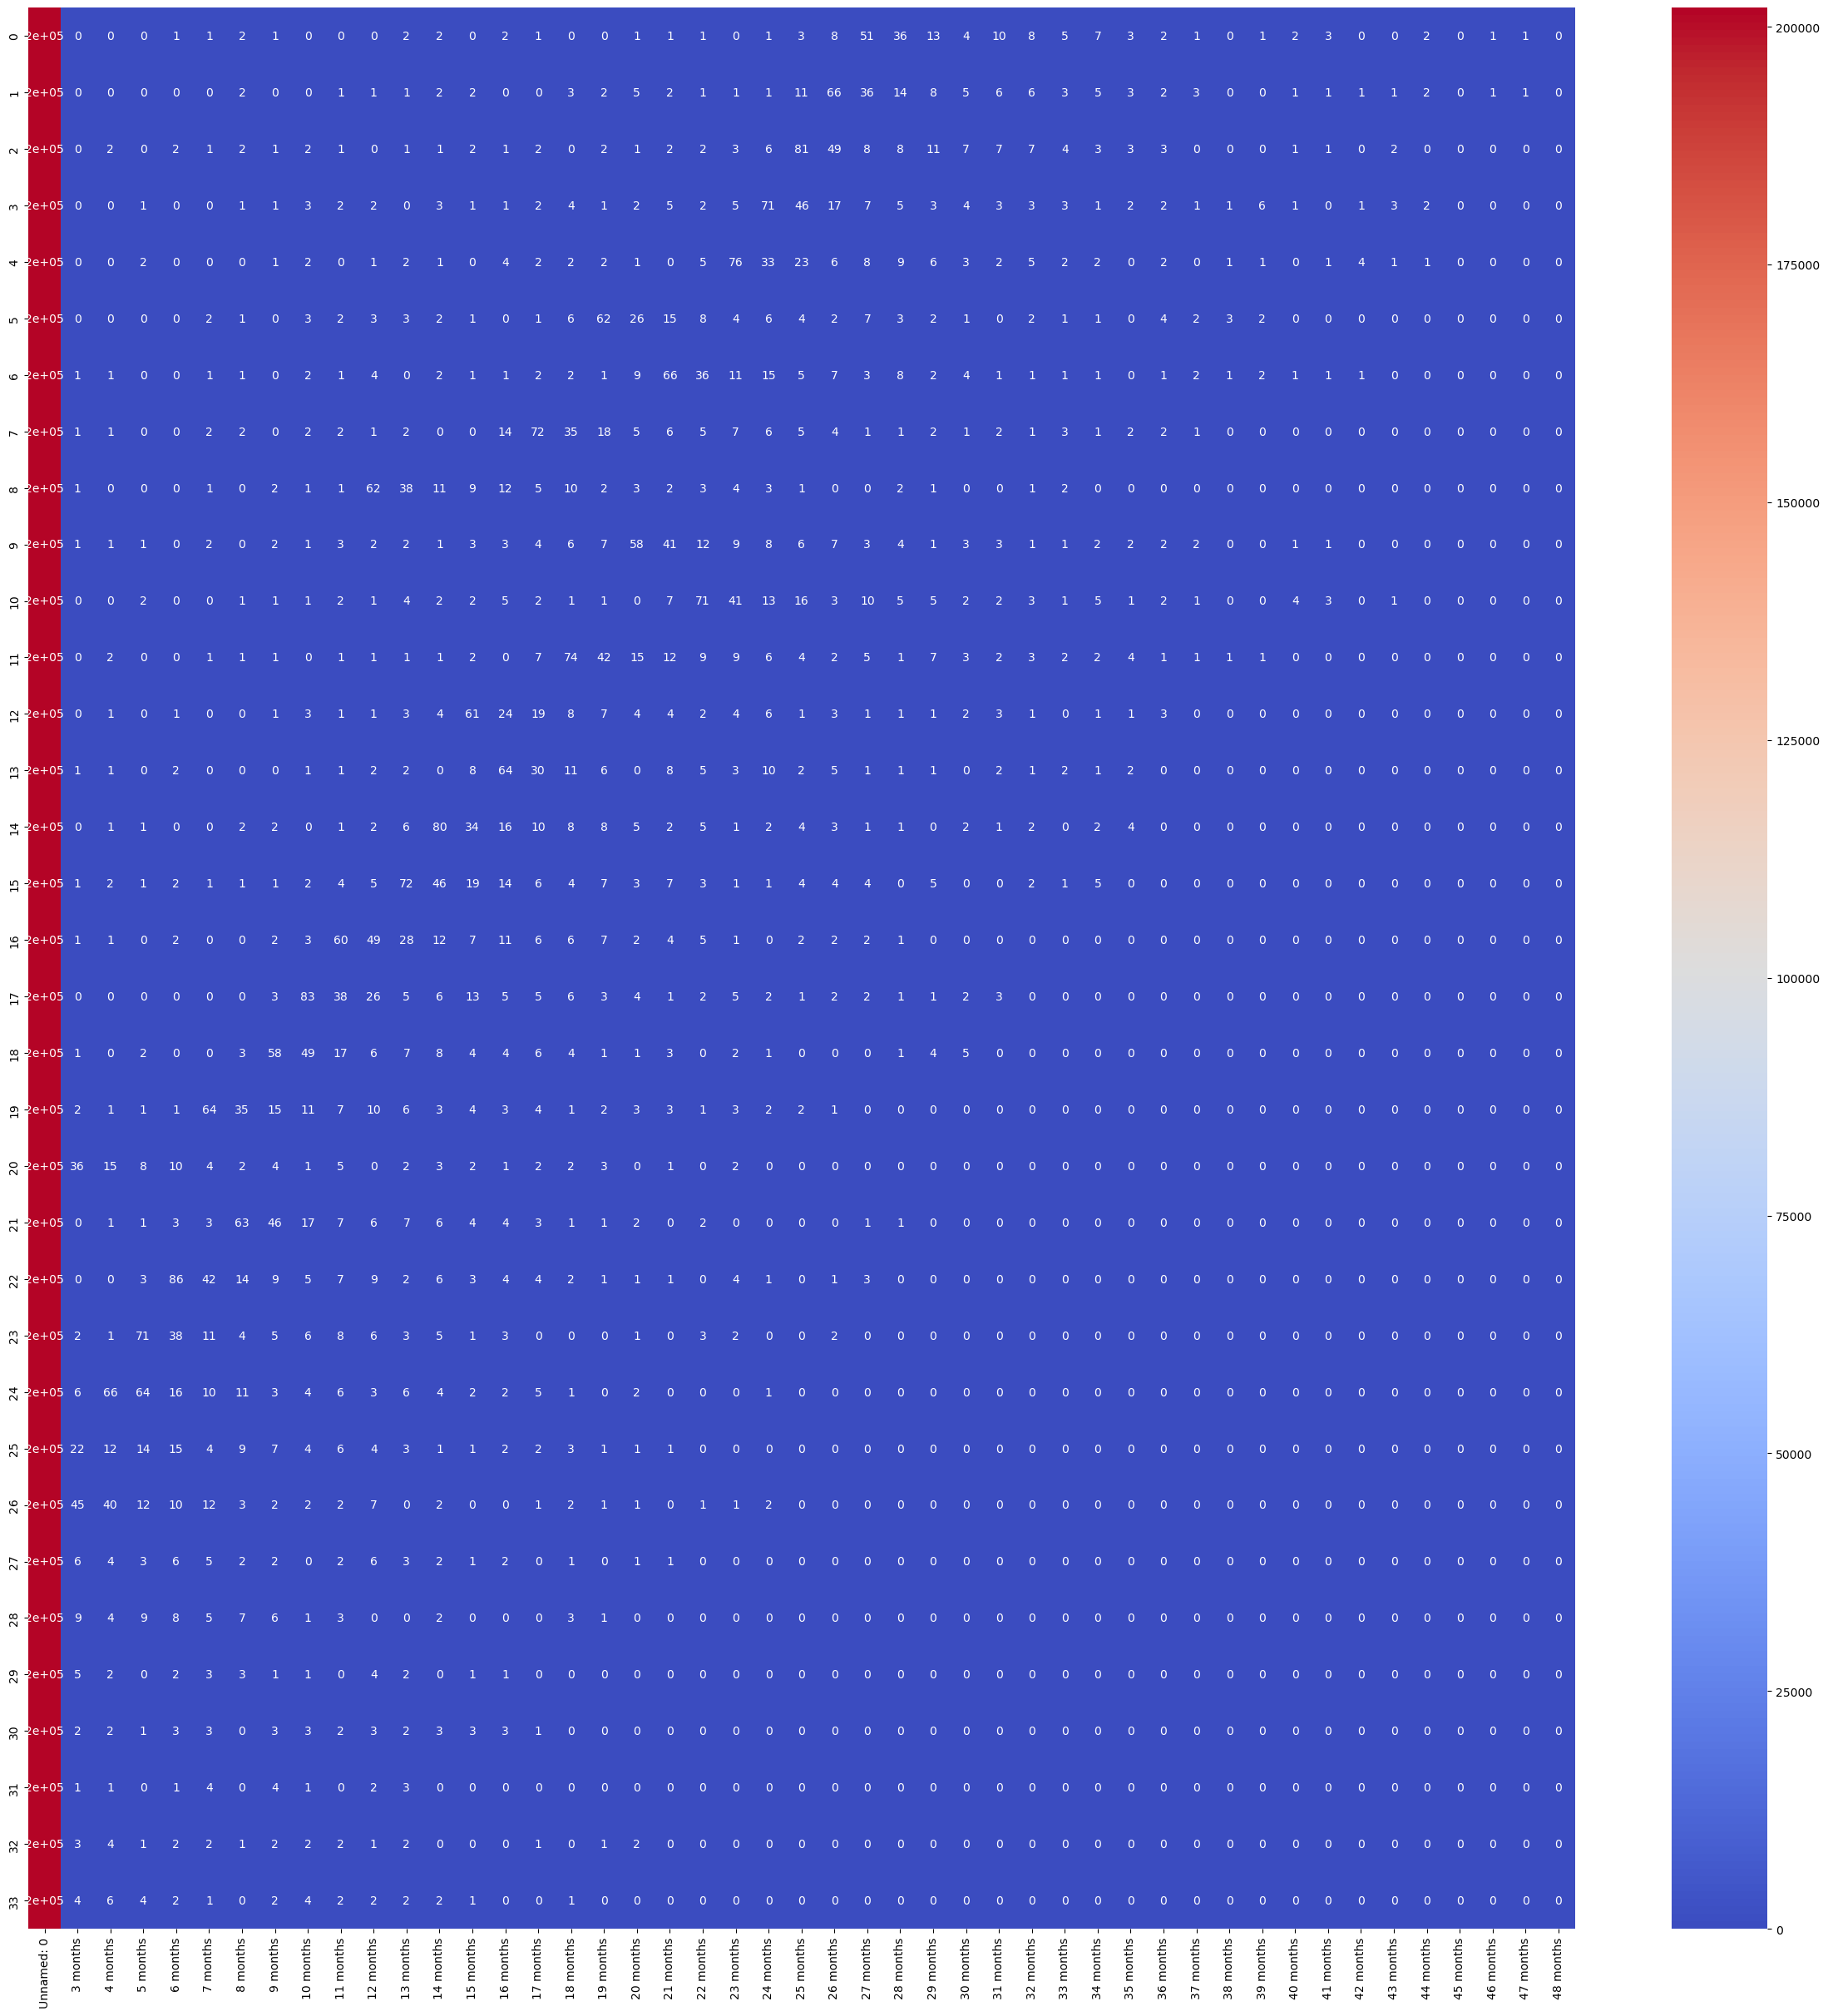

In [110]:
plt.figure(figsize=(30,30))
ax=sb.heatmap(plot_data,annot=True,cmap='coolwarm')
